## 3. Transformed output is a negative of the original image

In [1]:
from PIL import Image
import cv2
# Open the original image
im = Image.open("cameraman.tif")

# Apply the negative transformation
im = Image.eval(im, lambda px: 255 - px)

# Save the transformed image
im.save("negative.jpg")

## 6. Single composite transformation matrix

In [31]:
import numpy as np

# Reflect along x
reflect_matrix = np.array([[1, 0,0], [0, -1,0],[0,0,1]])

# Translate to point (10, 5)
translate_matrix = np.array([[1, 0, 10], [0, 1, 5], [0, 0, 1]])

# Rotate 60 degrees clockwise
theta = np.pi/3
rotate_matrix = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])

# Shear vertically by 10 units
shear_matrix = np.array([[1, 10, 0], [0, 1, 0], [0, 0, 1]])

# Composite transformation matrix
composite_matrix = reflect_matrix.dot(translate_matrix).dot(rotate_matrix).dot(shear_matrix)
print(composite_matrix)

[[ 0.5         4.1339746  10.        ]
 [-0.8660254  -9.16025404 -5.        ]
 [ 0.          0.          1.        ]]


## 7. Final transformed in reverse order

In [32]:
# Composite transformation matrix reversed
rev_composite_matrix = shear_matrix.dot(rotate_matrix).dot(translate_matrix).dot(reflect_matrix)
print(rev_composite_matrix)

[[  9.16025404  -4.1339746  112.27241336]
 [  0.8660254   -0.5         11.16025404]
 [  0.           0.           1.        ]]


## 8. Image transformation

In [2]:
import numpy as np
from skimage.transform import AffineTransform, warp

# Load an image
img = cv2.imread("maple.jpg", cv2.IMREAD_GRAYSCALE)

# Reflect along x
transform = AffineTransform(scale=(1, -1))
img_reflected = warp(img, transform)

# Translate to point (10, 5)
transform = AffineTransform(translation=(10, 5))
img_translated = warp(img_reflected, transform)

# Rotate 60 degrees clockwise
transform = AffineTransform(rotation=np.pi / 3)
img_rotated = warp(img_translated, transform)

# Shear vertically by 10 units
transform = AffineTransform(shear=10)
img_sheared = warp(img_rotated, transform)

# Store original transformation
img_trans = img_sheared
print(img_trans)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Image transformation in reverse

In [3]:
# Load an image
img = cv2.imread("maple.jpg", cv2.IMREAD_GRAYSCALE)

# Shear vertically by 10 units
transform = AffineTransform(shear=10)
img_sheared = warp(img, transform)

# Rotate 60 degrees clockwise
transform = AffineTransform(rotation=np.pi / 3)
img_rotated = warp(img_sheared, transform)

# Translate to point (10, 5)
transform = AffineTransform(translation=(10, 5))
img_translated = warp(img_rotated, transform)

# Reflect along x
transform = AffineTransform(scale=(1, -1))
img_reflected = warp(img_translated, transform)

# Store reversed transformation
img_rev = img_reflected
print(img_rev)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Image reflection

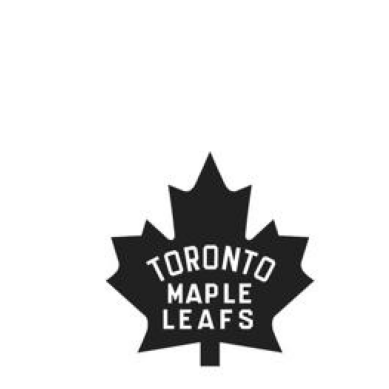

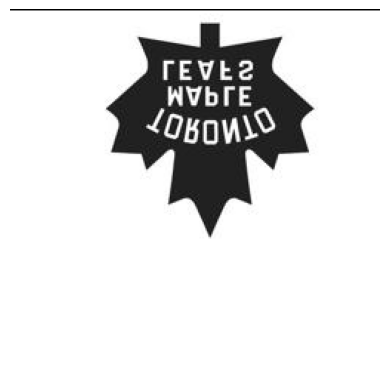

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# read the input image
img = cv2.imread("maple.jpg")
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for x-axis reflection 
## translating image vertically as per rows to form a substanial image reflection other than black
M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])

# apply a perspective transformation to the image
reflected_img = cv2.warpPerspective(img,M,(int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(reflected_img)
plt.show()
# save the resulting image to disk
#plt.imsave("city_reflected.jpg", reflected_img)

### Image translation by (10,5)

<>:7: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:7: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?


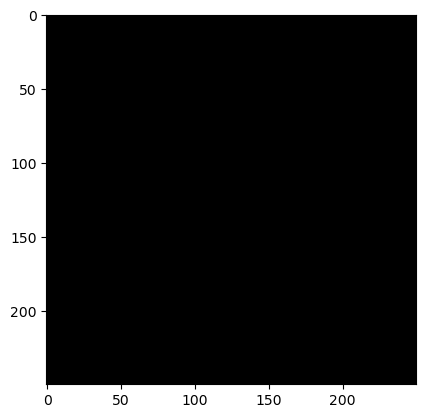

/var/folders/xd/7xbbxhs53f36m2cf0d1gf7jm0000gp/T/ipykernel_34504/227558167.py:7: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  M = np.float32([[1, 0, 10],0


TypeError: 'int' object is not subscriptable

In [18]:

# show the image
plt.imshow(reflected_img)
plt.show()
# get the image shape
rows, cols, dim = reflected_img.shape
# transformation matrix for translation
M = np.float32([[1, 0, 10],0
                [0, 1, 5],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(reflected_img, M, (cols, rows))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(translated_img)
plt.show()
# save the resulting image to disk
#plt.imsave("city_translated.jpg", translated_img)

### Image rotation by 60 degrees

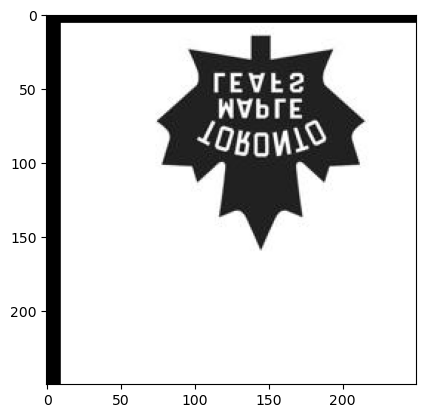

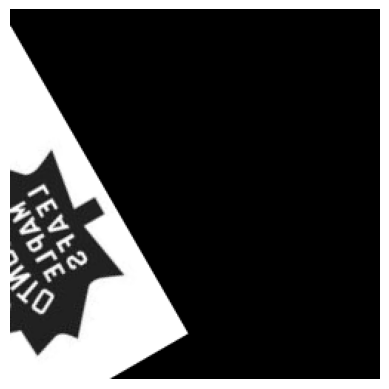

In [6]:
# show the image
plt.imshow(translated_img)
plt.show()
# get the image shape
rows, cols, dim = translated_img.shape
#angle from degree to radian
angle = np.radians(60)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
rotated_img = cv2.warpPerspective(translated_img, M, (int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(rotated_img)
plt.show()
# save the resulting image to disk
#plt.imsave("city_rotated.jpg", rotated_img)

### Shear the image

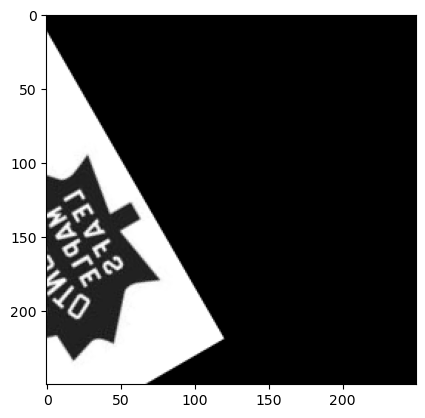

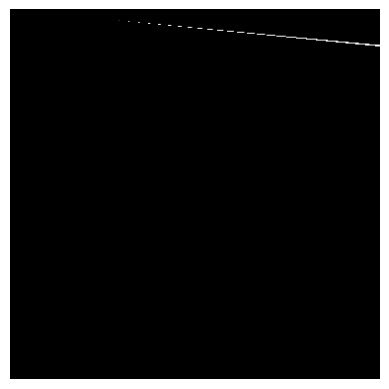

[[ 1. 10.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


In [7]:
# show the image
plt.imshow(rotated_img)
plt.show()
# get the image shape
rows, cols, dim = rotated_img.shape
# transformation matrix for Shearing

# shearing applied to y-axis
M = np.float32([[1,   10, 0],
                [0, 1, 0],
                [0,   0, 1]])
# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(rotated_img,M,(int(cols*1.5),int(rows*1.5)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(sheared_img)
plt.show()

# save transformed image
img_trans=sheared_img
print(M)

### Reverse transformations

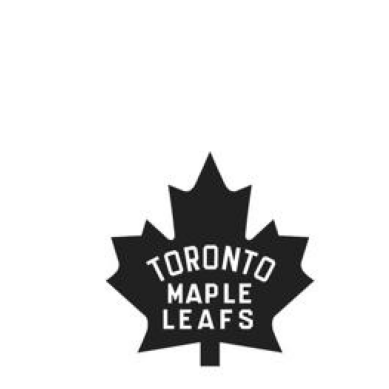

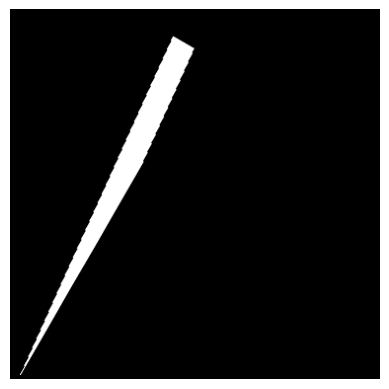

In [8]:

# read the input image
img = cv2.imread("maple.jpg")
# convert from BGR to RGB so we can plot using matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# disable x & y axis
plt.axis('off')
# show the image
plt.imshow(img)
plt.show()
# get the image shape
rows, cols, dim = img.shape
# transformation matrix for Shearing

# shearing applied to y-axis
M = np.float32([[1,   10, 0],
                [0, 1, 0],
                [0,   0, 1]])
# apply a perspective transformation to the image                
sheared_img = cv2.warpPerspective(img,M,(int(cols*1.5),int(rows*1.5)))

# get the image shape for the sheared Image
rows, cols, dim = sheared_img.shape
#angle from degree to radian
angle = np.radians(60)
#transformation matrix for Rotation
M = np.float32([[np.cos(angle), -(np.sin(angle)), 0],
            	[np.sin(angle), np.cos(angle), 0],
            	[0, 0, 1]])
# apply a perspective transformation to the image
rotated_img = cv2.warpPerspective(sheared_img, M, (int(cols),int(rows)))

# get the image shape for rotated image
rows, cols, dim = rotated_img.shape
# transformation matrix for translation
M = np.float32([[1, 0, 10],
                [0, 1, 5],
                [0, 0, 1]])
# apply a perspective transformation to the image
translated_img = cv2.warpPerspective(rotated_img, M, (cols, rows))

# get the image shape for translation
rows, cols, dim = translated_img.shape
# transformation matrix for x-axis reflection 
M = np.float32([[1,  0, 0   ],
                [0, -1, rows],
                [0,  0, 1   ]])

# apply a perspective transformation to the image
reflected_img = cv2.warpPerspective(translated_img,M,(int(cols),int(rows)))
# disable x & y axis
plt.axis('off')
# show the resulting image
plt.imshow(reflected_img)
plt.show()
#save reversed image
img_rev=reflected_img

### Plotting the transformations

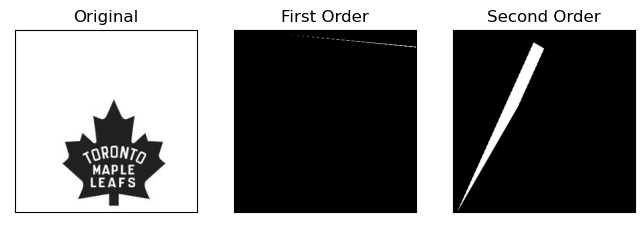

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(8, 3),
                         subplot_kw={'xticks': [], 'yticks': []})

axes[0].imshow(img, cmap=plt.cm.gray)
axes[0].set_title("Original")

axes[1].imshow(img_trans, cmap=plt.cm.gray)
axes[1].set_title("First Order")

axes[2].imshow(img_rev, cmap=plt.cm.gray)
axes[2].set_title("Second Order")

plt.show()

## 9. Histogram equalization

In [10]:
import cv2

# Load the image
img_org = cv2.imread("einstein-low-contrast.tif", cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
img_eq = cv2.equalizeHist(img_org)
print(img_eq)
# Save the equalized image
cv2.imwrite("equalized_image.jpg", img_eq)

[[193 207 207 ... 217 226 226]
 [204 207 207 ... 163   0   0]
 [207 203 199 ...  75  75  75]
 ...
 [ 75  75 101 ... 126 101 163]
 [101 101 126 ... 126 186 199]
 [ 75  75 101 ... 186 186 199]]


True

#### Comparing the histogram plots of orginal and the equalized images

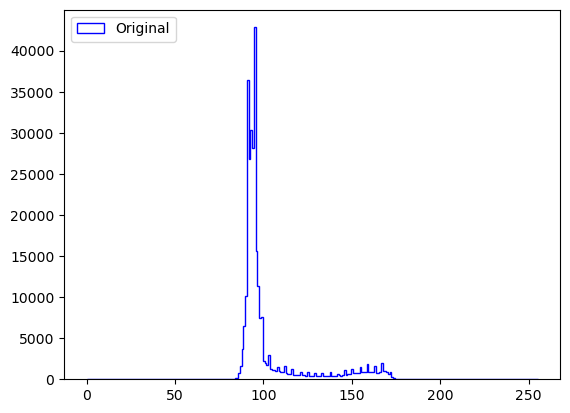

In [11]:
import matplotlib.pyplot as plt
import numpy as np

#need to convert the images to numpy arrays
img_org = np.array(img_org)

# Plot the original image's histogram
plt.hist(img_org.ravel(), bins=256, range=(0, 255), histtype='step', color='blue', label='Original')

plt.legend(loc='upper left')
plt.show()

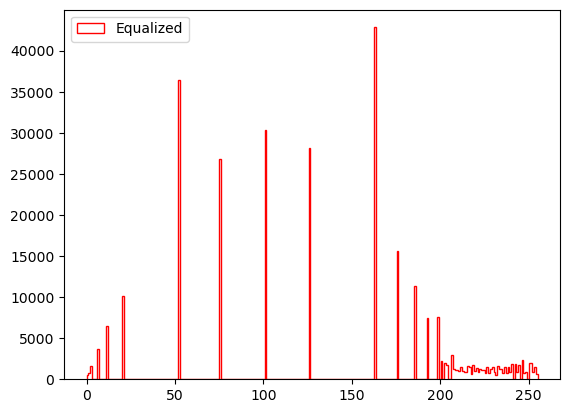

In [12]:

# Plot the equalized image's histogram
plt.hist(img_eq.ravel(), bins=256, range=(0, 255), histtype='step', color='red', label='Equalized')

plt.legend(loc='upper left')
plt.show()

## 10. Kernel Separable

In [13]:
import numpy as np

# Create a 3x2 kernel
kernel = np.array([[1, 2], [3, 4], [5, 6]])

# Create the two 1-D kernels
kernel_x = kernel[:, 0]
kernel_y = kernel[0, :]

# Perform the convolution using the two 1-D kernels
result = np.convolve(kernel_x, kernel_y, mode='full')

# Print the original kernel and the result of the convolution
print("Original kernel: \n", kernel)
print("Result of convolution: \n", result)

# check if the 2D kernel is separable
if(np.array_equal(kernel,result)):
    print("The kernel is separable")
else:
    print("The kernel is not separable")

Original kernel: 
 [[1 2]
 [3 4]
 [5 6]]
Result of convolution: 
 [ 1  5 11 10]
The kernel is not separable


## 10 a.) Convolve image by 3x2 kernel

In [14]:
# load image
img = cv2.imread("corvette-moire-pattern.tif")

# create 3x2 kernel
kernel = np.array([[1,2], [3,4], [5,6]])

# convolve image with kernel
img1 = cv2.filter2D(img, -1, kernel)

## 10. b.) Separable kernel one by one

In [15]:
# load image
img = cv2.imread("corvette-moire-pattern.tif")

# create kernels
kernel1 = cv2.getGaussianKernel(5, 1)
kernel2 = cv2.getGaussianKernel(5, 2)

# convolve image with first kernel
img = cv2.filter2D(img, -1, kernel1)

# convolve image with second kernel
img2 = cv2.filter2D(img, -1, kernel2)

## Comparing outputs of a and b

In [16]:
from skimage import metrics

#img1 = ... # Convolved image 1
#img2 = ... # Convolved image 2

ssim = metrics.structural_similarity(img1, img2, win_size=3, multichannel=True, channel_axis=2)
print(ssim)

0.3836127428788985


/var/folders/xd/7xbbxhs53f36m2cf0d1gf7jm0000gp/T/ipykernel_34504/862685074.py:6: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim = metrics.structural_similarity(img1, img2, win_size=3, multichannel=True, channel_axis=2)


The ssim output is a value between -1 and 1, with a value of 1 indicating that the two images are identical, and a value of -1 indicating that the two images are completely different. Here the value is **0.383** hence they're not so similar. 